In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# loading df
df = pd.read_csv('Dataset.csv')
df.head()



,comment,random,label,individual,75%,50%,25%,10%,5%
0,It was awesome,Artist,Music,Music,Music,useless,useless,useless,useless
1,Supper songs brother,Music,Music,Music,Artist,Artist,useless,Music,Music
2,love you talha,useless,Artist,Artist,Artist,Artist,Artist,Artist,useless
3,this is not a song . this is some thing unique...,Artist,Music,Music,Music,Music,Music,Music,Music
4,speechless,Music,Music,Music,Music,useless,useless,useless,useless


In [41]:
def get_match_count(df,label, label2):
    count = 0
    for i in range(0, len(df)):
        if df[label][i] == df[label2][i]:
            count += 1

    return count

total = len(df)
match_random = get_match_count(df,'random', 'label')
match_individual = get_match_count(df,'individual', 'label')
match_75 = get_match_count(df,'75%', 'label')
match_50 = get_match_count(df,'50%', 'label')
match_25 = get_match_count(df,'25%', 'label')
match_10 = get_match_count(df,'10%', 'label')
match_5 = get_match_count(df,'5%', 'label')

# print percventages for all 
print(f'Random: {match_random/total*100}%')
print(f'Individual: {match_individual/total*100}%')
print(f'75%: {match_75/total*100}%')
print(f'50%: {match_50/total*100}%')
print(f'25%: {match_25/total*100}%')
print(f'10%: {match_10/total*100}%')
print(f'5%: {match_5/total*100}%')

Random: 33.33333333333333%
Individual: 74.69879518072288%
75%: 73.09236947791165%
50%: 66.66666666666666%
25%: 57.028112449799195%
10%: 51.40562248995983%
5%: 53.01204819277109%


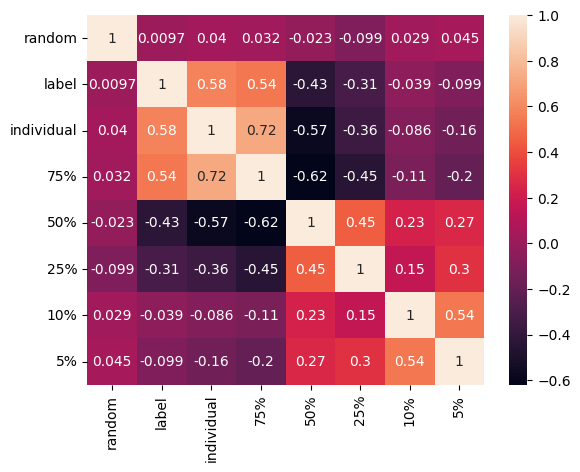

In [42]:
# make corr matrix of match between all labels
corr_matrix = df[['random', 'label','individual', '75%', '50%', '25%', '10%', '5%']].apply(lambda x : x.factorize()[0]).corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


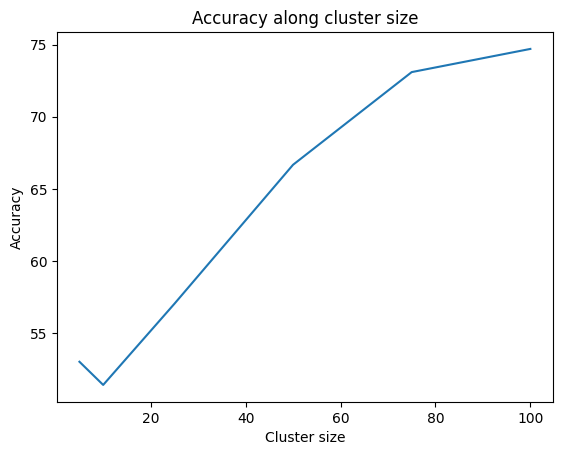

In [43]:
# plot accuracy along cluter size 
cluster_accuracy = [match_5/total*100, match_10/total*100, match_25/total*100, match_50/total*100, match_75/total*100, match_individual/total*100]
cluster_size = [5, 10, 25, 50, 75, 100]
plt.plot(cluster_size, cluster_accuracy)
plt.xlabel('Cluster size')
plt.ylabel('Accuracy')
plt.title('Accuracy along cluster size')
plt.show()

In [159]:
# new_df copy of mergerd df with classes combined into main classes 
new_df = merged_df.copy()

new_df['label'] = new_df['label'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['random'] = new_df['random'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['individual'] = new_df['individual'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['75%'] = new_df['75%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['50%'] = new_df['50%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['25%'] = new_df['25%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['10%'] = new_df['10%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})
new_df['5%'] = new_df['5%'].replace({'Ambiguous': 'useless', 'Others': 'useless'})

new_total = len(new_df)
new_match_random = get_match_count(new_df,'random', 'label')
new_match_individual = get_match_count(new_df,'individual', 'label')
new_match_75 = get_match_count(new_df,'75%', 'label')
new_match_50 = get_match_count(new_df,'50%', 'label')
new_match_25 = get_match_count(new_df,'25%', 'label')
new_match_10 = get_match_count(new_df,'10%', 'label')
new_match_5 = get_match_count(new_df,'5%', 'label')

# print percventages for all
print(f'Random: {new_match_random/new_total*100}%')
print(f'Individual: {new_match_individual/new_total*100}%')
print(f'75%: {new_match_75/new_total*100}%')
print(f'50%: {new_match_50/new_total*100}%')
print(f'25%: {new_match_25/new_total*100}%')
print(f'10%: {new_match_10/new_total*100}%')
print(f'5%: {new_match_5/new_total*100}%')

new_df.head()


Random: 33.33333333333333%
Individual: 74.69879518072288%
75%: 73.09236947791165%
50%: 66.66666666666666%
25%: 57.028112449799195%
10%: 51.40562248995983%
5%: 53.01204819277109%


,comment,random,75%,25%,50%,10%,5%,individual,label
0,It was awesome,Artist,Music,useless,useless,useless,useless,Music,Music
1,Supper songs brother,Music,Artist,useless,Artist,Music,Music,Music,Music
2,love you talha,useless,Artist,Artist,Artist,Artist,useless,Artist,Artist
3,this is not a song . this is some thing unique...,Artist,Music,Music,Music,Music,Music,Music,Music
4,speechless,Music,Music,useless,useless,useless,useless,Music,Music


In [160]:
def per_label_accuracy(temp_df, target_col):

    result = {}

    for col in temp_df.columns:
        if col == target_col:
            continue  # Skip the target column itself
        
        label_accuracies = {}
        for label in temp_df[col].unique():
            # Calculate accuracy for this label
            mask = temp_df[col] == label
            accuracy = (temp_df[target_col][mask] == label).mean()
            label_accuracies[label] = accuracy
        
        result[col] = label_accuracies
    
    accuracy_df = pd.DataFrame(result).fillna(0)
    
    return accuracy_df
    



In [163]:
accuracy_df = per_label_accuracy(new_df, 'label')
accuracy_df.tail(3)

,comment,random,75%,25%,50%,10%,5%,individual
Artist,0.0,0.187500,0.657534,0.500000,0.608696,0.339623,0.300000,0.662162
Music,0.0,0.322034,0.808219,0.640625,0.757143,0.600000,0.629630,0.885246
useless,0.0,0.412698,0.728155,0.566929,0.645455,0.534483,0.539062,0.728070


Text(50.722222222222214, 0.5, 'Label')

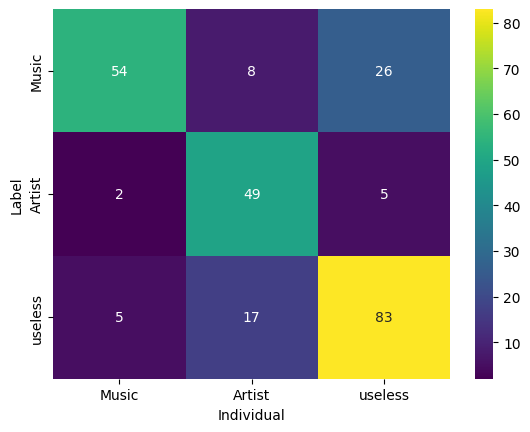

In [179]:
def label_corr(df, col1, col2):

    labels_col1 = df[col1].unique()
    labels_col2 = df[col2].unique()
    
    # Initialize a matrix to hold the counts
    matrix = pd.DataFrame(0, index=labels_col1, columns=labels_col2)
    
    # Count occurrences of each label combination
    for label1 in labels_col1:
        for label2 in labels_col2:
            matrix.loc[label1, label2] = ((df[col1] == label1) & (df[col2] == label2)).sum()
    
    
    return matrix


corr = label_corr(new_df, 'label', 'individual')
# plot as heatmap and label axis use viridis color map
sns.heatmap(corr, cmap='viridis', annot=True)
plt.xlabel('Individual')
plt.ylabel('Label')
# plt.show()
# corr

Text(50.72222222222221, 0.5, 'Label')

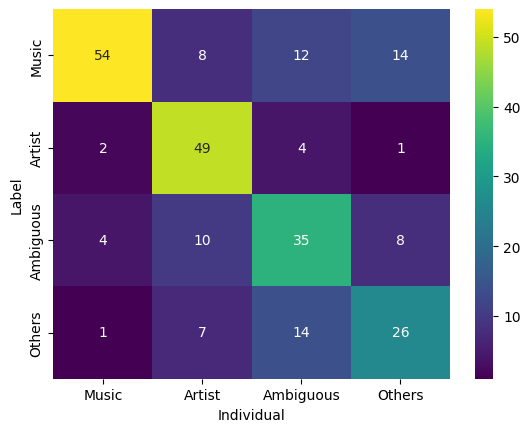

In [175]:
data = {
    'Music': [54, 2, 1, 4],
    'Artist': [8, 49, 7, 10],
    'Ambiguous': [12, 4, 14, 35],
    'Others': [14, 1, 26, 8]
}
index_labels = ['Music', 'Artist', 'Others', 'Ambiguous']

# Create the DataFrame
matrix = pd.DataFrame(data, index=index_labels)

# Ensure the order of columns and rows is the same
desired_order = ['Music', 'Artist', 'Ambiguous', 'Others']
matrix = matrix.loc[desired_order, desired_order]

# Plot the heatmap
sns.heatmap(matrix, cmap='viridis', annot=True)
plt.xlabel('Individual')    
plt.ylabel('Label')

In [180]:
# save dataset

new_df.to_csv('Dataset.csv', index=False)